In [1]:
import os
import torch
import warnings
warnings.filterwarnings('ignore')

import GCAST
os.environ["R_HOME"] =  "/public/home/ljquan/anaconda3/envs/myx/lib/R"
random_seed = 2025
device = "cuda:0" if torch.cuda.is_available() else "cpu"
packnames = ('mclust',)


# os.chdir(r"C:\Users\24112\Desktop\item\test")
# print("loading path...", os.getcwd())


The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


In [2]:
data_root = "./Dataset/DLPFC"
sample_name = [
    "151673",
    "151674",
    "151675",
    "151676",
]
negi = 12
n_clusters = 7

In [3]:
GCAST.set_seed(random_seed)
adata, graph_dict = GCAST.Load10xST(data_root, sample_name, n_clusters, mode="batch", negi = negi).data()

net = GCAST.GCAST(adata.obsm["X_pca"], graph_dict, device=device, model_name="subject3")
net.train_with_dec()


net.load_model()
feat, _, _ = net.eval_model()
adata.obsm["emb"] = feat


 17%|█▋        | 170/1000 [01:22<06:40,  2.07it/s]


In [4]:
adata = GCAST.hm_integration(adata, harmony_key='emb' )

2025-10-23 11:59:18,783 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-10-23 11:59:22,200 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-10-23 11:59:22,288 - harmonypy - INFO - Iteration 1 of 10
2025-10-23 11:59:25,521 - harmonypy - INFO - Iteration 2 of 10
2025-10-23 11:59:28,221 - harmonypy - INFO - Iteration 3 of 10
2025-10-23 11:59:30,940 - harmonypy - INFO - Iteration 4 of 10
2025-10-23 11:59:33,920 - harmonypy - INFO - Iteration 5 of 10
2025-10-23 11:59:35,281 - harmonypy - INFO - Iteration 6 of 10
2025-10-23 11:59:36,304 - harmonypy - INFO - Converged after 6 iterations


In [5]:
GCAST.mclust_R(adata, n_clusters=n_clusters, use_rep="emb", random_seed=random_seed)
GCAST.evaluate_cluster(adata)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.1.1
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%
mclust ARI:0.5713 NMI:0.6951 AMI:0.6948 purity:0.7781, homogeneity:0.6997, completeness:0.6904, v_measure:0.6951


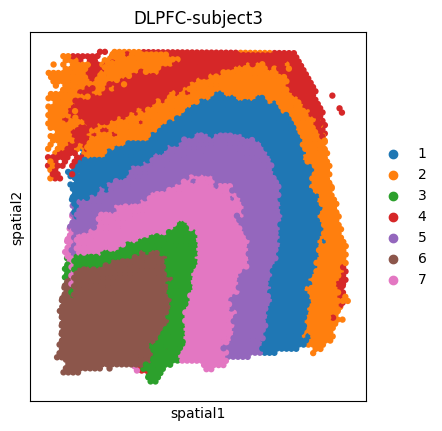

In [6]:
GCAST.plot_spatial(adata, color="mclust", title="DLPFC-subject3",  save=False, show=True)

In [8]:
GCAST.eval_batch(adata, output_key="emb", label=True)

median ILISI:3.1569714731723786 
mean ILISI:3.109219248846025
median CLISI:1.0900805067888057 
mean CLISI:1.291902986813652


(array([3.10491888, 3.60601359, 2.31838447, ..., 2.2694283 , 2.11890249,
        2.8323257 ]),
 array([1.        , 1.03976831, 1.        , ..., 1.        , 1.05696626,
        1.1213693 ]))